In [ ]:
#@title Twitter Auth Token

twitter_auth_token = '4fddaee47cdb46cde384f4d86c93d502a97978c1'

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
cu

CRAWLING DATA

In [ ]:
# Crawl Data

filename = 'data_bhs.csv'
search_keyword = 'aplikasi belajar bahasa asing'
limit = 10000

!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.0]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1)
Filling in keywords: aplikasi belajar bahasa asing

 (2) (3)

Your tweets saved to: /content/tweets-data/data_bhs.csv
Total tweets saved: 19

-- Scrolling... (1) (2)

Your tweets saved to: /content/tweets-data/data_bhs.csv
Total tweets saved: 39

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/data_bhs.csv
Total tweets saved: 59

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/data_bhs.csv
Total tweets saved: 79

-- Scrolling... (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21)No more tweets found, please chec

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/data_bhs.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1708325366954131803,Sun Oct 01 03:38:01 +0000 2023,236,Dengan adanya kerjasama ini Florisen dan @caka...,1708325366954131803,https://pbs.twimg.com/media/F7Uw1xfXYAALFYw.jpg,NaN,in,Dunia Flora,21,14,68,https://twitter.com/FloRisenID/status/17083253...,1153035835370962944,FloRisenID
1,1713422975108866520,Sun Oct 15 05:14:05 +0000 2023,409,Aplikasi untuk belajar bahasa asing - memrise ...,1713422975108866520,NaN,NaN,in,"Bandung, Indonesia",1,36,75,https://twitter.com/dhelsadell/status/17134229...,294528028,dhelsadell
2,1623165848348393472,Wed Feb 08 03:44:29 +0000 2023,72,8 situs atau aplikasi free untuk belajar bahas...,1623165848348393472,https://pbs.twimg.com/media/Foaku26aUAAxiQK.jpg,NaN,in,"DKI Jakarta, Indonesia",1,2,21,https://twitter.com/UJunami/status/16231658483...,1376555310,UJunami
3,1737515637130563807,Wed Dec 20 16:49:44 +0000 2023,2,Ingin meracuni para #langtwt #studytwt #ambisv...,1737515637130563807,https://pbs.twimg.com/ext_tw_video_thumb/17375...,NaN,in,Bookmarks:,1,0,0,https://twitter.com/SAMDAL_RI/status/173751563...,4717305013,SAMDAL_RI
4,1680188246826057729,Sat Jul 15 12:11:11 +0000 2023,109,⭐️ PERBANYAK VOCABULARIES ️ : Kalian pasti bak...,1680188254988144642,https://pbs.twimg.com/media/F1Ej4NSaIAAf4re.jpg,kakschery,in,silly asylum,0,1,30,https://twitter.com/kakschery/status/168018825...,1601461446390386688,kakschery


In [3]:
df = df[['created_at', 'full_text', 'username']]
df

,created_at,full_text,username
0,Sun Oct 01 03:38:01 +0000 2023,Dengan adanya kerjasama ini Florisen dan @caka...,FloRisenID
1,Sun Oct 15 05:14:05 +0000 2023,Aplikasi untuk belajar bahasa asing - memrise ...,dhelsadell
2,Wed Feb 08 03:44:29 +0000 2023,8 situs atau aplikasi free untuk belajar bahas...,UJunami
3,Wed Dec 20 16:49:44 +0000 2023,Ingin meracuni para #langtwt #studytwt #ambisv...,SAMDAL_RI
4,Sat Jul 15 12:11:11 +0000 2023,⭐️ PERBANYAK VOCABULARIES ️ : Kalian pasti bak...,kakschery
...,...,...,...
74,Sat Jan 27 08:29:56 +0000 2024,@Omnduut iya yan. aku juga penasaran nih soaln...,ayanapunya
75,Sun Dec 03 03:58:54 +0000 2023,Bahasa Asing: - Perkuat kemampuan berbahasa as...,Privatalfaiz
76,Wed Dec 06 05:52:14 +0000 2023,@worksfess Belajar bahasa asing di aplikasi du...,kazekage810
77,Tue Jan 02 03:35:58 +0000 2024,@ringerIaktat Tau ngga salah satu match w ada ...,madrieregal


**1. Cleaning Data**

In [4]:
df.shape

(79, 3)

In [5]:
df = df.drop_duplicates(subset=['full_text'])

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

created_at    0
full_text     0
username      0
dtype: int64

In [9]:
df.shape

(79, 3)

In [10]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) # menghapus mention
  text = re.sub(r'#\w+', '', text) # menghapus hashtag
  text = re.sub(r'RT[\s]+', '', text) # menghapus RT
  text = re.sub(r'https?://\S+', '', text) # menghapus URL
  text = re.sub(r'[^A-Za-z0-9 ]', '', text) # menghapus alphanumerik
  # text = re.sub(r'\s+', ' ', text).strip() # menghapus spasi berlebihan

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [11]:
df ['full_text'] = df['full_text'].str.lower()

In [12]:
df

,created_at,full_text,username
0,Sun Oct 01 03:38:01 +0000 2023,dengan adanya kerjasama ini florisen dan akan...,FloRisenID
1,Sun Oct 15 05:14:05 +0000 2023,aplikasi untuk belajar bahasa asing memrise ...,dhelsadell
2,Wed Feb 08 03:44:29 +0000 2023,8 situs atau aplikasi free untuk belajar bahas...,UJunami
3,Wed Dec 20 16:49:44 +0000 2023,ingin meracuni para aplikasi underrated bua...,SAMDAL_RI
4,Sat Jul 15 12:11:11 +0000 2023,perbanyak vocabularies kalian pasti bakal b...,kakschery
...,...,...,...
74,Sat Jan 27 08:29:56 +0000 2024,iya yan aku juga penasaran nih soalnya banyak...,ayanapunya
75,Sun Dec 03 03:58:54 +0000 2023,bahasa asing perkuat kemampuan berbahasa asin...,Privatalfaiz
76,Wed Dec 06 05:52:14 +0000 2023,belajar bahasa asing di aplikasi duolingo,kazekage810
77,Tue Jan 02 03:35:58 +0000 2024,tau ngga salah satu match w ada yang ajaib al...,madrieregal


**2. Preprocessing**

In [13]:
# Normalisasi

norm ={" yg ":  " yang ", " ga ": " tidak ", " w ": " aku "}
def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,created_at,full_text,username
0,Sun Oct 01 03:38:01 +0000 2023,dengan adanya kerjasama ini florisen dan akan...,FloRisenID
1,Sun Oct 15 05:14:05 +0000 2023,aplikasi untuk belajar bahasa asing memrise ...,dhelsadell
2,Wed Feb 08 03:44:29 +0000 2023,8 situs atau aplikasi free untuk belajar bahas...,UJunami
3,Wed Dec 20 16:49:44 +0000 2023,ingin meracuni para aplikasi underrated bua...,SAMDAL_RI
4,Sat Jul 15 12:11:11 +0000 2023,perbanyak vocabularies kalian pasti bakal b...,kakschery
...,...,...,...
74,Sat Jan 27 08:29:56 +0000 2024,iya yan aku juga penasaran nih soalnya banyak...,ayanapunya
75,Sun Dec 03 03:58:54 +0000 2023,bahasa asing perkuat kemampuan berbahasa asin...,Privatalfaiz
76,Wed Dec 06 05:52:14 +0000 2023,belajar bahasa asing di aplikasi duolingo,kazekage810
77,Tue Jan 02 03:35:58 +0000 2024,tau ngga salah satu match aku ada yang ajaib ...,madrieregal


In [14]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [16]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak", "ngga"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df ['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,created_at,full_text,username
0,Sun Oct 01 03:38:01 +0000 2023,adanya kerjasama florisen membagikan 1400 vou...,FloRisenID
1,Sun Oct 15 05:14:05 +0000 2023,aplikasi belajar bahasa asing memrise babbel...,dhelsadell
2,Wed Feb 08 03:44:29 +0000 2023,8 situs aplikasi free belajar bahasa asing mud...,UJunami
3,Wed Dec 20 16:49:44 +0000 2023,meracuni aplikasi underrated buat belajar b...,SAMDAL_RI
4,Sat Jul 15 12:11:11 +0000 2023,perbanyak vocabularies kalian bakal butuh b...,kakschery
...,...,...,...
74,Sat Jan 27 08:29:56 +0000 2024,iya yan aku penasaran nih soalnya banyak maka...,ayanapunya
75,Sun Dec 03 03:58:54 +0000 2023,bahasa asing perkuat kemampuan berbahasa asin...,Privatalfaiz
76,Wed Dec 06 05:52:14 +0000 2023,belajar bahasa asing aplikasi duolingo,kazekage810
77,Tue Jan 02 03:35:58 +0000 2024,tau salah satu match aku ajaib alihalih ngaja...,madrieregal


In [17]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0     [adanya, kerjasama, florisen, membagikan, 1400...
1     [aplikasi, belajar, bahasa, asing, memrise, ba...
2     [8, situs, aplikasi, free, belajar, bahasa, as...
3     [meracuni, aplikasi, underrated, buat, belajar...
4     [perbanyak, vocabularies, kalian, bakal, butuh...
                            ...                        
74    [iya, yan, aku, penasaran, nih, soalnya, banya...
75    [bahasa, asing, perkuat, kemampuan, berbahasa,...
76         [belajar, bahasa, asing, aplikasi, duolingo]
77    [tau, salah, satu, match, aku, ajaib, alihalih...
78    [aplikasi, belajar, bahasa, asing, android, ke...
Name: full_text, Length: 79, dtype: object

In [18]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/drive/MyDrive/Colab Notebooks/hasil_preprocessing.csv", index=False)

ada kerjasama florisen bagi 1400 voucher ajar bahasa asing gratis klaim 3 bulan lalu aplikasi cakap temanteman dapat voucher sebut klaim langsung dm instagram florisenid
aplikasi ajar bahasa asing memrise babbel busuu mondly duolingo hinative rosetta stone beelinguapp grammarly fluentu template ppt gratis slidesgo canva templatewise moga bantu
8 situs aplikasi free ajar bahasa asing mudah sederhana bantu banget buat suka ajar halhal baru a thread
racun aplikasi underrated buat ajar bahasa asing 40 lebih bahasa sini
banyak vocabularies kalian bakal butuh bangett bekal vocabkosakata literasi binggris paham teks tanya tipe soal vocabulary synonym amp meaning nahh aku rekomendasi aplikasi ajar bahasa asing
contoh beberapa buku jual sini buku novel nonfiksi buku ajar bahasa asing bayar baca aplikasi
aplikasi lumayan buat ajar dikit2 bahasa asing
niat install aplikasi buat ajar bahasa inggris eh malah curhat sama orang asing kata semangat terharuu
ajar asah skill baru ajar beberapa bahasa as

3. Transalate

In [19]:
!pip install translate

In [20]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hasil_preprocessing.csv", encoding='latin1')
data.head()

,full_text
0,ada kerjasama florisen bagi 1400 voucher ajar ...
1,aplikasi ajar bahasa asing memrise babbel busu...
2,8 situs aplikasi free ajar bahasa asing mudah ...
3,racun aplikasi underrated buat ajar bahasa asi...
4,banyak vocabularies kalian bakal butuh bangett...


In [21]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv("/content/drive/MyDrive/Colab Notebooks/hasil_translate_languageCourse.csv")

**4. Labeling**

In [22]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hasil_translate_languageCourse.csv", index_col=0)
data

,full_text,tweet_english
0,ada kerjasama florisen bagi 1400 voucher ajar ...,there is florisen cooperation for 1400 free fo...
1,aplikasi ajar bahasa asing memrise babbel busu...,foreign language teaching application memrise ...
2,8 situs aplikasi free ajar bahasa asing mudah ...,8 free application sites teach foreign languag...
3,racun aplikasi underrated buat ajar bahasa asi...,poison underrated application for teaching for...
4,banyak vocabularies kalian bakal butuh bangett...,many vocabularies you will need to provide Eng...
...,...,...
74,iya yan aku penasaran nih soal banyak maka apl...,"yes, I'm curious about many things, so the app..."
75,bahasa asing kuat mampu bahasa asing utama bah...,strong foreign language able to be the main fo...
76,ajar bahasa asing aplikasi duolingo,teach foreign languages duolingo app
77,tau salah satu match aku ajaib alihalih ngajak...,know one of the matches I magically switched t...


In [23]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [24]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 43
Netral = 3
Negatif = 33

Total Data : 79


In [35]:
data['klasifikasi'] = status
data.drop(columns=['klasisfikasi'], inplace=True)

data

,full_text,tweet_english,klasifikasi
0,ada kerjasama florisen bagi 1400 voucher ajar ...,there is florisen cooperation for 1400 free fo...,Positif
1,aplikasi ajar bahasa asing memrise babbel busu...,foreign language teaching application memrise ...,Negatif
2,8 situs aplikasi free ajar bahasa asing mudah ...,8 free application sites teach foreign languag...,Positif
3,racun aplikasi underrated buat ajar bahasa asi...,poison underrated application for teaching for...,Positif
4,banyak vocabularies kalian bakal butuh bangett...,many vocabularies you will need to provide Eng...,Positif
...,...,...,...
74,iya yan aku penasaran nih soal banyak maka apl...,"yes, I'm curious about many things, so the app...",Positif
75,bahasa asing kuat mampu bahasa asing utama bah...,strong foreign language able to be the main fo...,Positif
76,ajar bahasa asing aplikasi duolingo,teach foreign languages duolingo app,Negatif
77,tau salah satu match aku ajaib alihalih ngajak...,know one of the matches I magically switched t...,Positif


**5. Visualisasi**

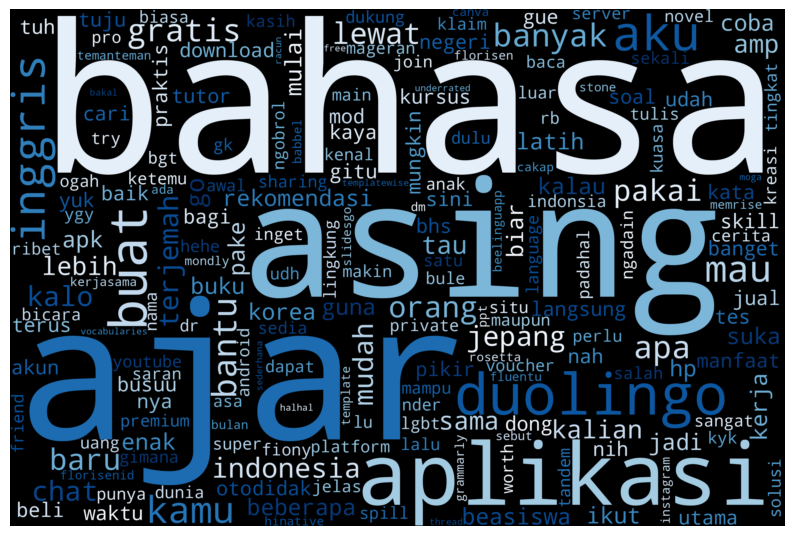

In [31]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

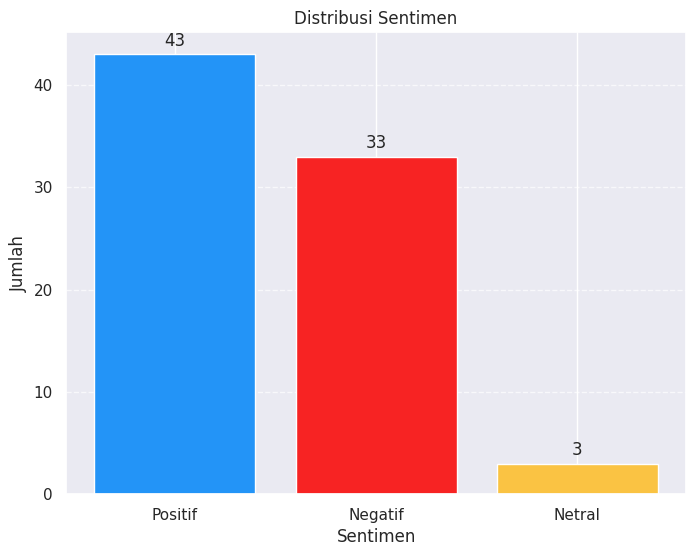

In [32]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen")

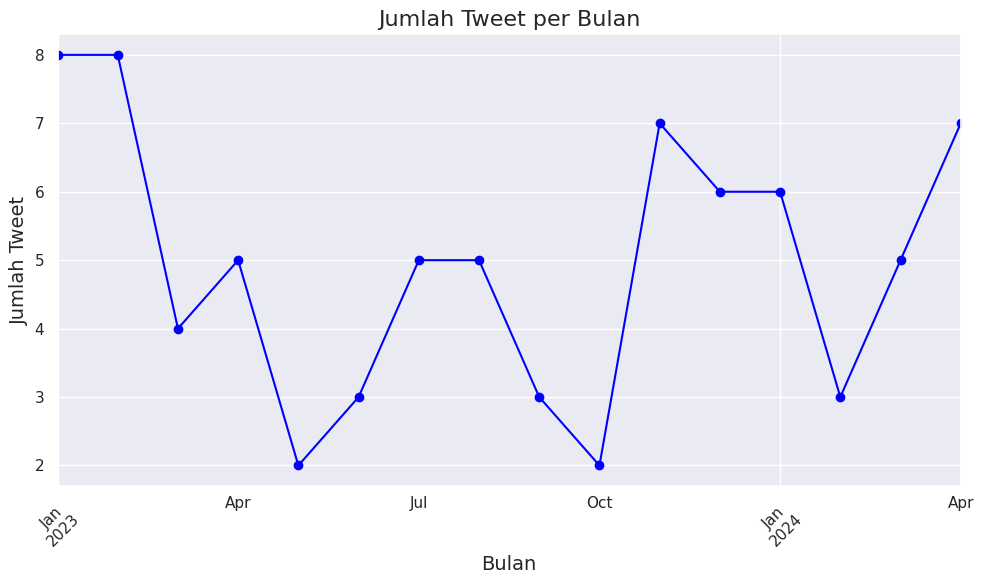

In [42]:
# Time Series Visualization

# Ubah 'created_at' menjadi tipe data datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

# Set 'created_at' sebagai index
df.set_index('created_at', inplace=True)

# Agregasi data berdasarkan bulan
tweets_per_month = df.resample('M').size()

# Visualisasi time series
plt.figure(figsize=(10, 6))
tweets_per_month.plot(color='blue', marker='o', linestyle='-')
plt.title('Jumlah Tweet per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Tweet', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**6. Klasifikasi Sentimen**

In [36]:
data

,full_text,tweet_english,klasifikasi
0,ada kerjasama florisen bagi 1400 voucher ajar ...,there is florisen cooperation for 1400 free fo...,Positif
1,aplikasi ajar bahasa asing memrise babbel busu...,foreign language teaching application memrise ...,Negatif
2,8 situs aplikasi free ajar bahasa asing mudah ...,8 free application sites teach foreign languag...,Positif
3,racun aplikasi underrated buat ajar bahasa asi...,poison underrated application for teaching for...,Positif
4,banyak vocabularies kalian bakal butuh bangett...,many vocabularies you will need to provide Eng...,Positif
...,...,...,...
74,iya yan aku penasaran nih soal banyak maka apl...,"yes, I'm curious about many things, so the app...",Positif
75,bahasa asing kuat mampu bahasa asing utama bah...,strong foreign language able to be the main fo...,Positif
76,ajar bahasa asing aplikasi duolingo,teach foreign languages duolingo app,Negatif
77,tau salah satu match aku ajaib alihalih ngajak...,know one of the matches I magically switched t...,Positif


In [43]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [45]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if (n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)

In [46]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.7215189873417721


In [47]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 29
Netral = 0
Negatif = 50

Total Data : 79


In [48]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

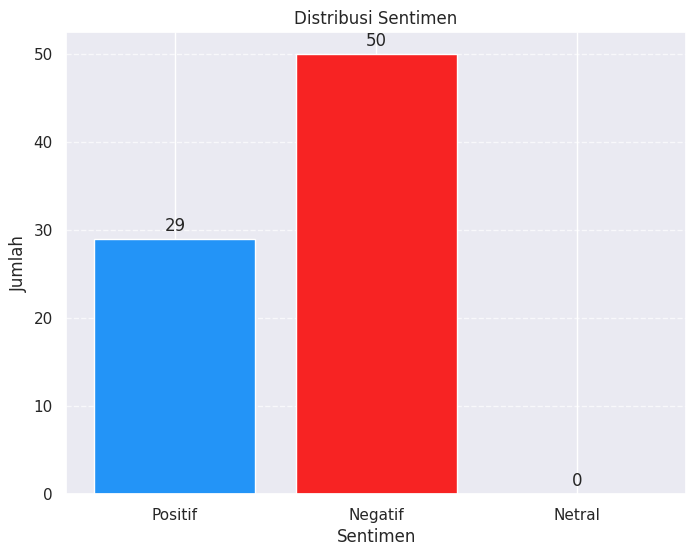

In [49]:
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen")

In [50]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,ada kerjasama florisen bagi 1400 voucher ajar ...,there is florisen cooperation for 1400 free fo...,Positif,Positif
1,aplikasi ajar bahasa asing memrise babbel busu...,foreign language teaching application memrise ...,Negatif,Negatif
2,8 situs aplikasi free ajar bahasa asing mudah ...,8 free application sites teach foreign languag...,Positif,Negatif
3,racun aplikasi underrated buat ajar bahasa asi...,poison underrated application for teaching for...,Positif,Negatif
4,banyak vocabularies kalian bakal butuh bangett...,many vocabularies you will need to provide Eng...,Positif,Positif
...,...,...,...,...
74,iya yan aku penasaran nih soal banyak maka apl...,"yes, I'm curious about many things, so the app...",Positif,Positif
75,bahasa asing kuat mampu bahasa asing utama bah...,strong foreign language able to be the main fo...,Positif,Negatif
76,ajar bahasa asing aplikasi duolingo,teach foreign languages duolingo app,Negatif,Negatif
77,tau salah satu match aku ajaib alihalih ngajak...,know one of the matches I magically switched t...,Positif,Positif


In [51]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]} \n')
    else:
        print("Tuple tidak memiliki cukup elemen")

Text: 8 situs aplikasi free ajar bahasa asing mudah sederhana bantu banget buat suka ajar halhal baru a thread
Classifier: Positif
Classifier Bayes: Negatif 

Text: racun aplikasi underrated buat ajar bahasa asing 40 lebih bahasa sini
Classifier: Positif
Classifier Bayes: Negatif 

Text: aplikasi lumayan buat ajar dikit2 bahasa asing
Classifier: Positif
Classifier Bayes: Negatif 

Text: niat install aplikasi buat ajar bahasa inggris eh malah curhat sama orang asing kata semangat terharuu
Classifier: Netral
Classifier Bayes: Negatif 

Text: ajar asah skill baru ajar beberapa bahasa asing lalu platform aplikasi playstore maupun channel youtube bahasa inggris jepang korea
Classifier: Positif
Classifier Bayes: Negatif 

Text: duolingo mod apk aplikasi ajar bahasa asing baru 2022
Classifier: Positif
Classifier Bayes: Negatif 

Text: duolingo mod apk aplikasi ajar bahasa asing baru 2022
Classifier: Positif
Classifier Bayes: Negatif 

Text: duolingo mod apk aplikasi ajar bahasa asing baru 202